In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook
%matplotlib inline

import torch
import torchvision
import torch.nn.functional as F
import numpy as np
import pandas as pd
from typing import Tuple, List, Callable, Optional
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from functions import *

if torch.cuda.is_available():
    DEVICE = 'cuda'
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    DEVICE = 'cpu'

print('Using {}'.format(DEVICE))

Using cpu


Constants

In [2]:
INPUT_SIZE = 28*28
BATCH_SIZE = 32
SEQ_LENGTH = 9
LOSS_FN = L1Loss

Local imports

In [3]:
import mnist
import plot
import Bathtub
import PretNet
from train import train

Load MNIST dataset

In [4]:
training_set, validation_set, test_set = mnist.load(val_ratio=0.0)

### Section 3.4

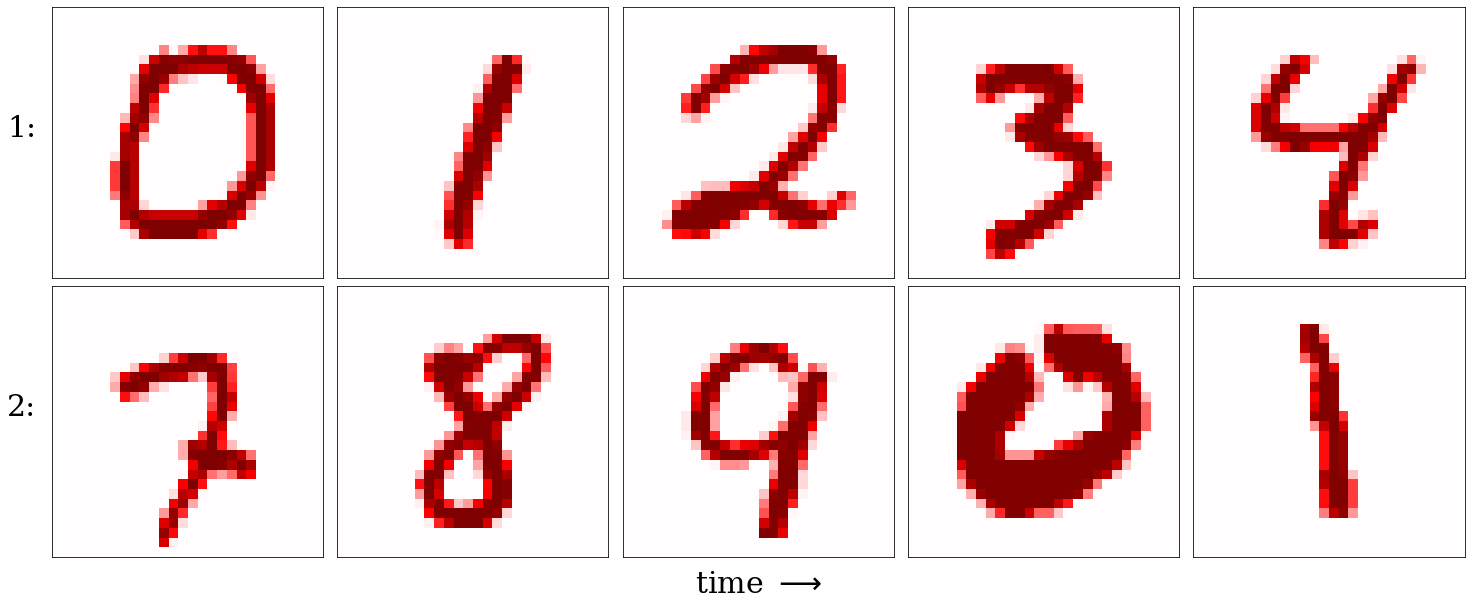

In [7]:
plot.example_mnist_sequences(test_set, save=False)

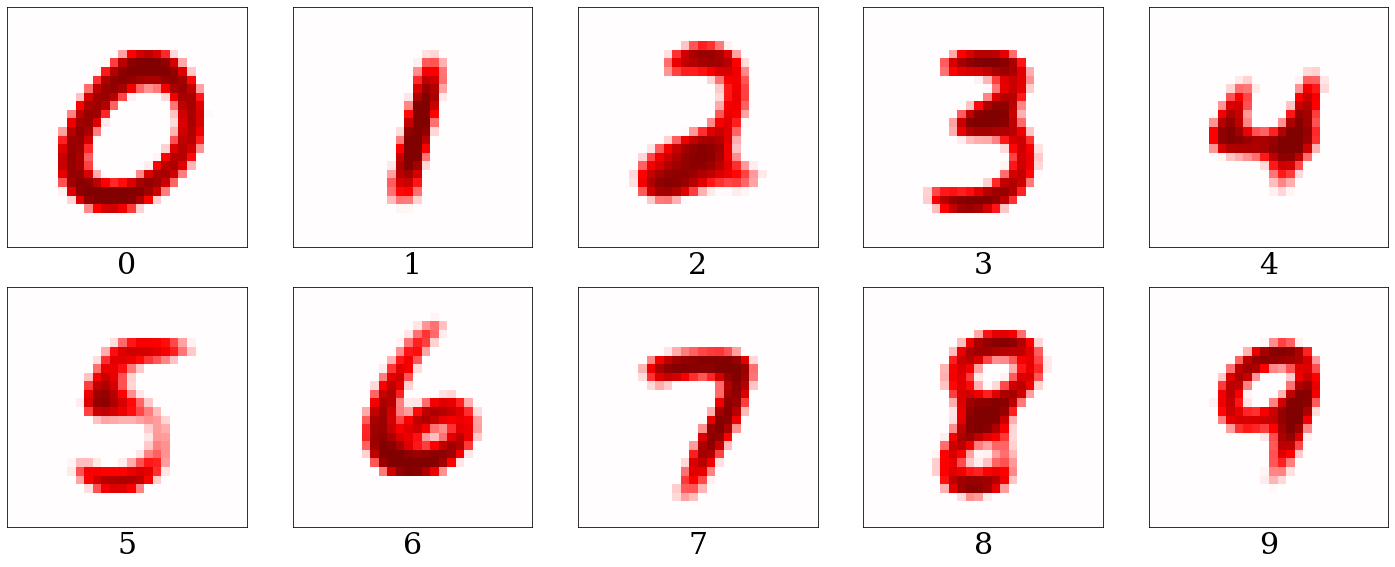

In [8]:
plot.mnist_medians(training_set, save=False)

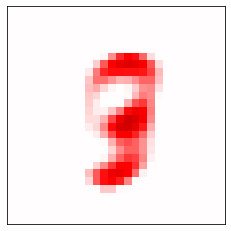

In [9]:
plot.mnist_median(training_set, save=False)

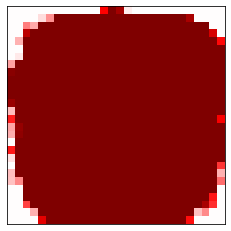

In [10]:
plot.mnist_sum(training_set, save=False)

### Section 4.1

In [5]:
HIDDEN_SIZE = 64

In [6]:
lstm = PretNet.State(
    modeltype=PretNet.LSTM,
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=5e-4,
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    title="pretnet/lstm-relu-seq9",
    device=DEVICE)

rnn = PretNet.State(
    modeltype=PretNet.RNN,
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=5e-4,
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    title="pretnet/rnn-relu-seq9",
    device=DEVICE)

tub = Bathtub.State(
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=1e-4,
    input_size=INPUT_SIZE,
    hidden_size=INPUT_SIZE + HIDDEN_SIZE,
    title="bathtub/64u-seq9-relu",
    device=DEVICE)

The following code can, if uncommented, be used to train the models:

In [ ]:
# train(lstm,
#       train_ds=training_set,
#       test_ds=test_set,
#       loss_fn=LOSS_FN,
#       num_epochs=100,
#       batch_size=BATCH_SIZE,
#       sequence_length=SEQ_LENGTH,
#       verbose=False)

# train(rnn,
#       train_ds=training_set,
#       test_ds=test_set,
#       loss_fn=LOSS_FN,
#       num_epochs=200,
#       batch_size=BATCH_SIZE,
#       sequence_length=SEQ_LENGTH,
#       verbose=False)

# train(tub,
#       train_ds=training_set,
#       test_ds=test_set,
#       loss_fn=LOSS_FN,
#       num_epochs=200,
#       batch_size=BATCH_SIZE,
#       sequence_length=SEQ_LENGTH,
#       verbose=False)

However, pre-trained models used in the thesis are provided, so we load those:

In [7]:
lstm.load()
rnn.load()
tub.load()

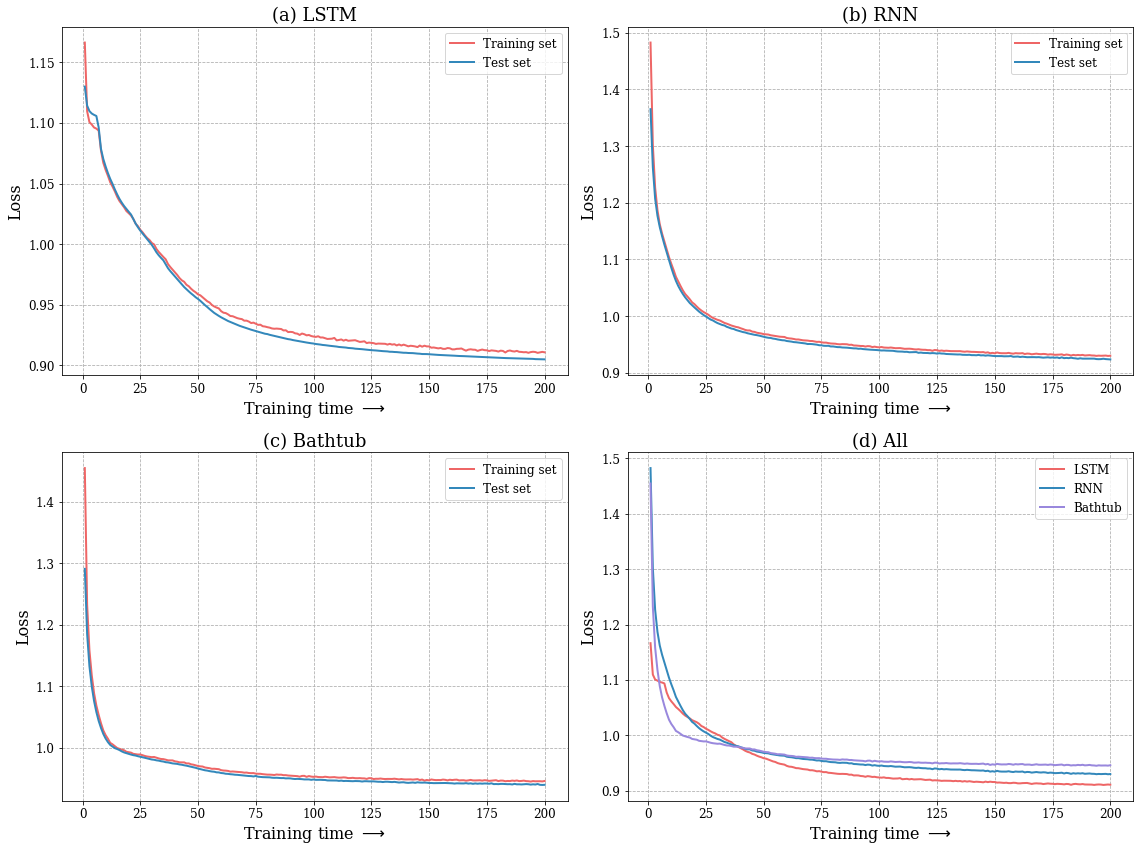

In [28]:
plot.training_progress(lstm, rnn, tub, save=False)

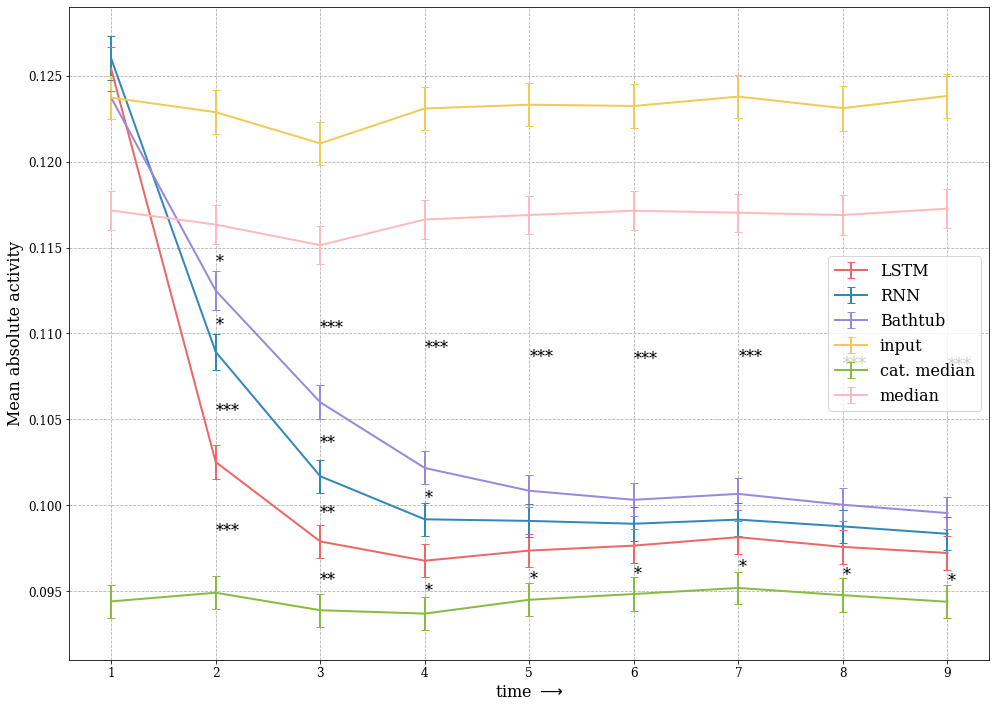

In [12]:
plot.model_activity(lstm, rnn, tub, training_set, test_set, save=False)

### Section 4.2

In this section we compare our models from the previous section with untrained models. So we initialise new models but don't train them or load any existing models:

In [29]:
lstm_u = PretNet.State(
    modeltype=PretNet.LSTM,
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=5e-4,
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    title="pretnet/lstm-relu-seq9-u",
    device=DEVICE)
rnn_u = PretNet.State(
    modeltype=PretNet.RNN,
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=5e-4,
    input_size=INPUT_SIZE,
    hidden_size=HIDDEN_SIZE,
    title="pretnet/rnn-relu-seq9-u",
    device=DEVICE)
tub_u = Bathtub.State(
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=1e-4,
    input_size=INPUT_SIZE,
    hidden_size=INPUT_SIZE + HIDDEN_SIZE,
    title="bathtub/64u-seq9-relu-u",
    device=DEVICE)

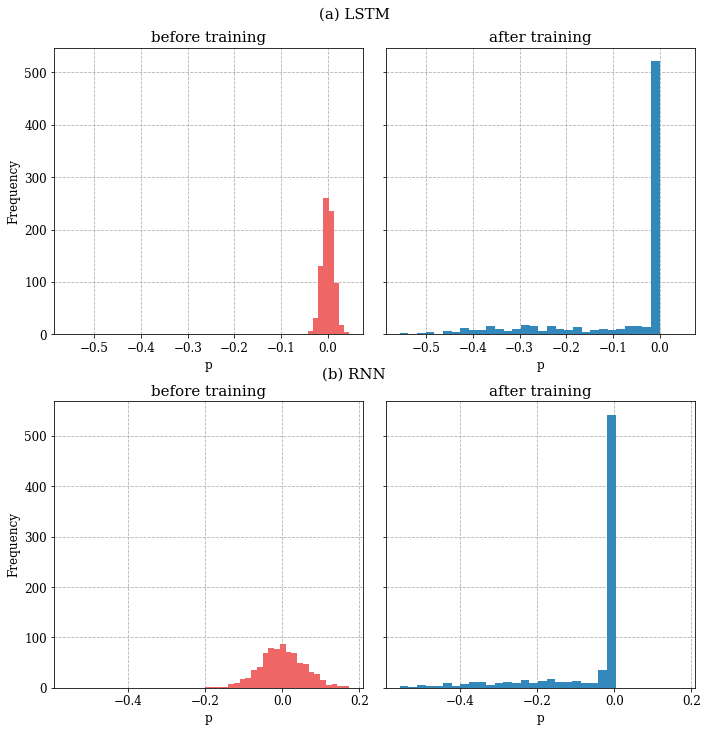

In [33]:
plot.feedback_hist(lstm, lstm_u, rnn, rnn_u, tub, tub_u, test_set, save=False)

### Section 4.3

In [13]:
ms = Bathtub.State(
    activation_func=torch.nn.ReLU(),
    optimizer=torch.optim.Adam,
    lr=1e-4,
    input_size=INPUT_SIZE,
    hidden_size=INPUT_SIZE,
    title="bathtub/seq9-relu",
    device=DEVICE)
ms.load()

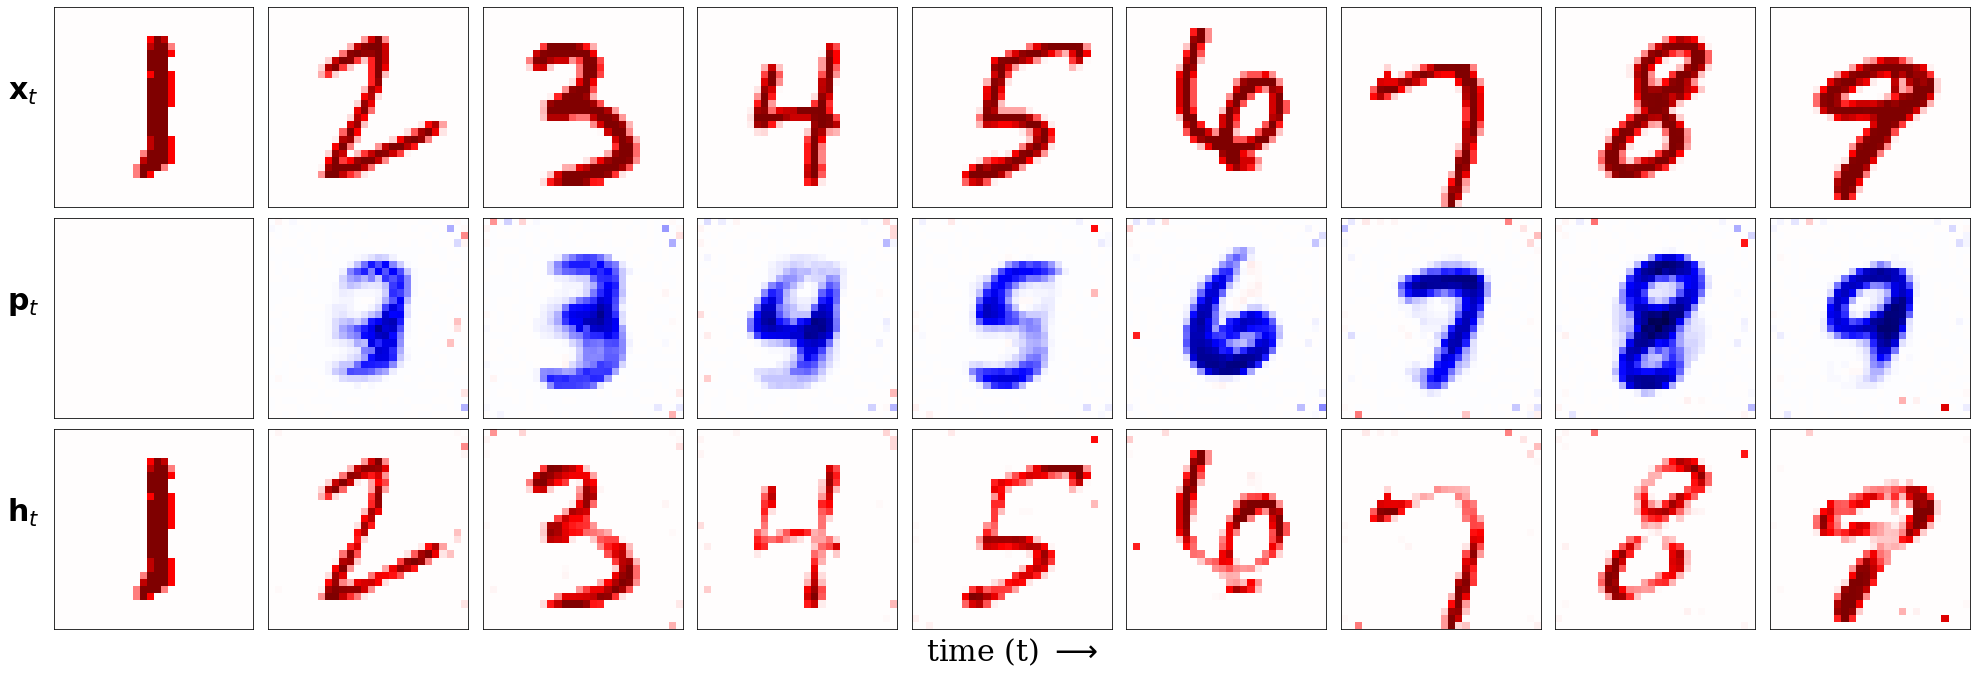

In [37]:
plot.example_sequence_state(ms, test_set, save=False)

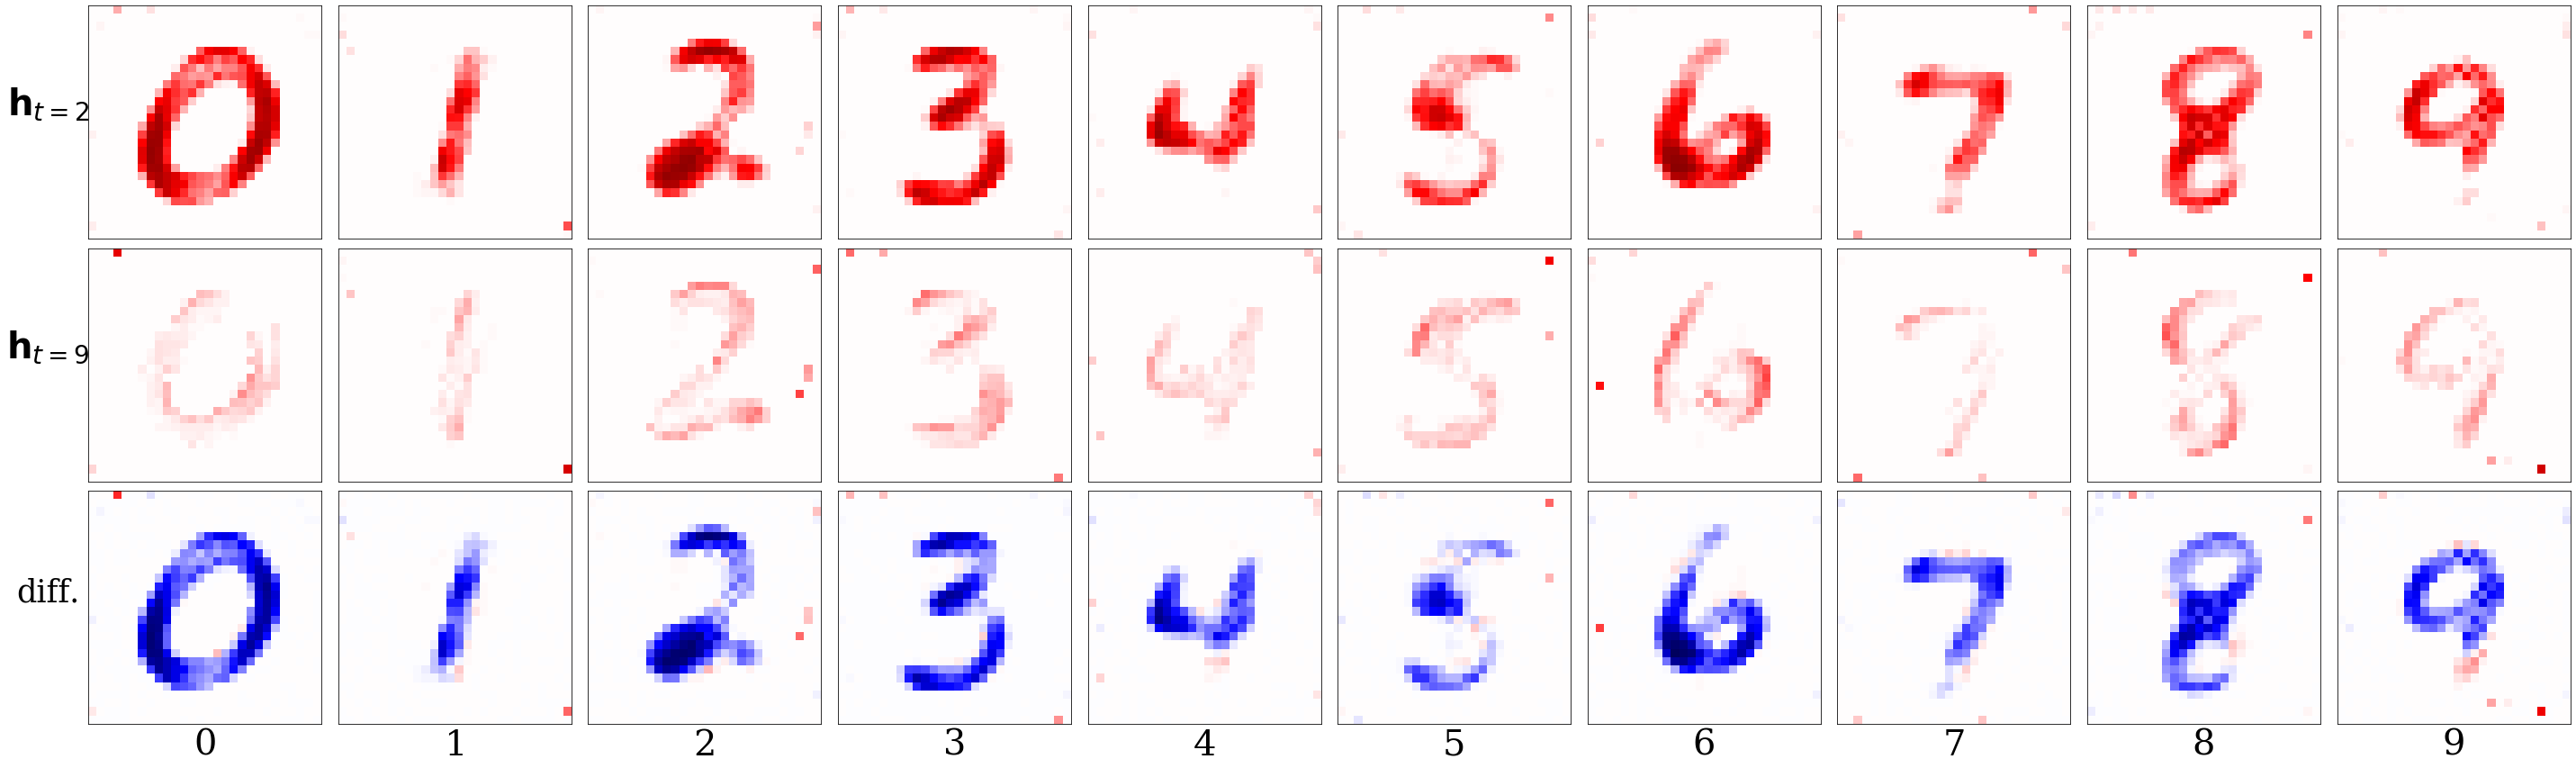

In [38]:
plot.difference_h_t2_vs_t9(ms, test_set, mask=None, save=False)

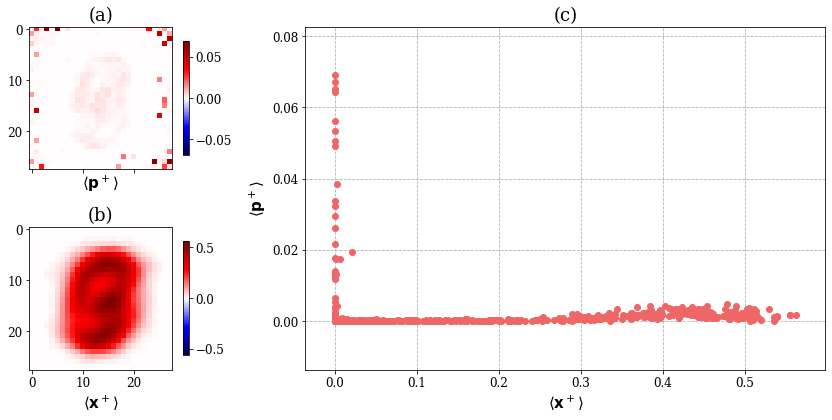

In [15]:
plot.xdrive_pdrive(ms, test_set, save=False)

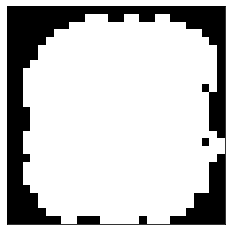

In [14]:
plot.prediction_units(ms, test_set, save=False)

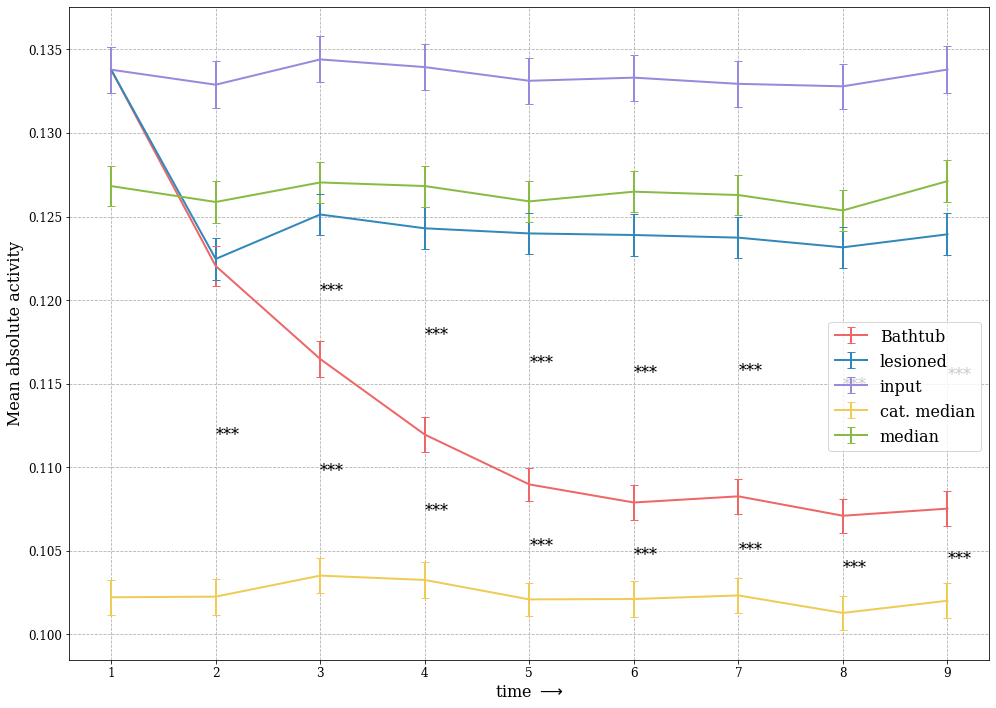

In [19]:
plot.model_activity_lesioned(ms, training_set, test_set, seq_length=9, seed=2553, save=True)

### Appendix

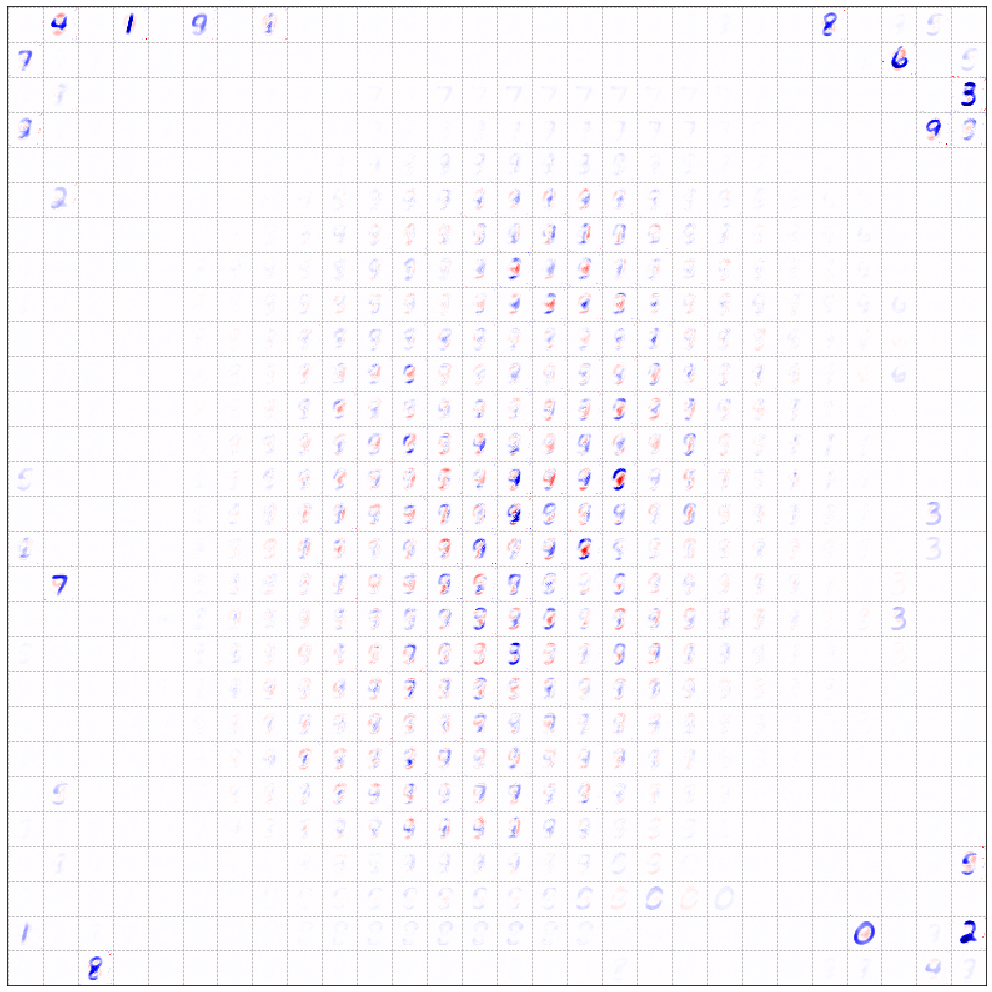

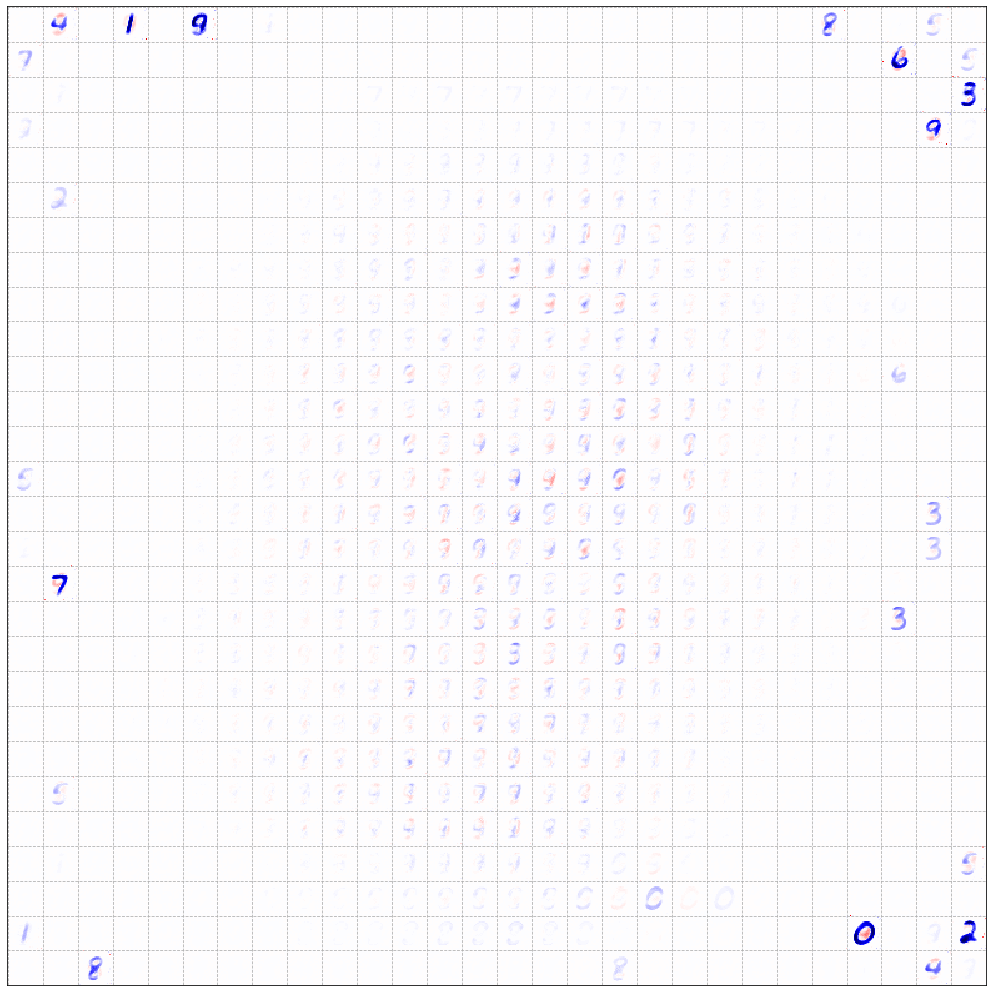

In [47]:
plot.weights_mean_activity(ms, test_set, save=False)

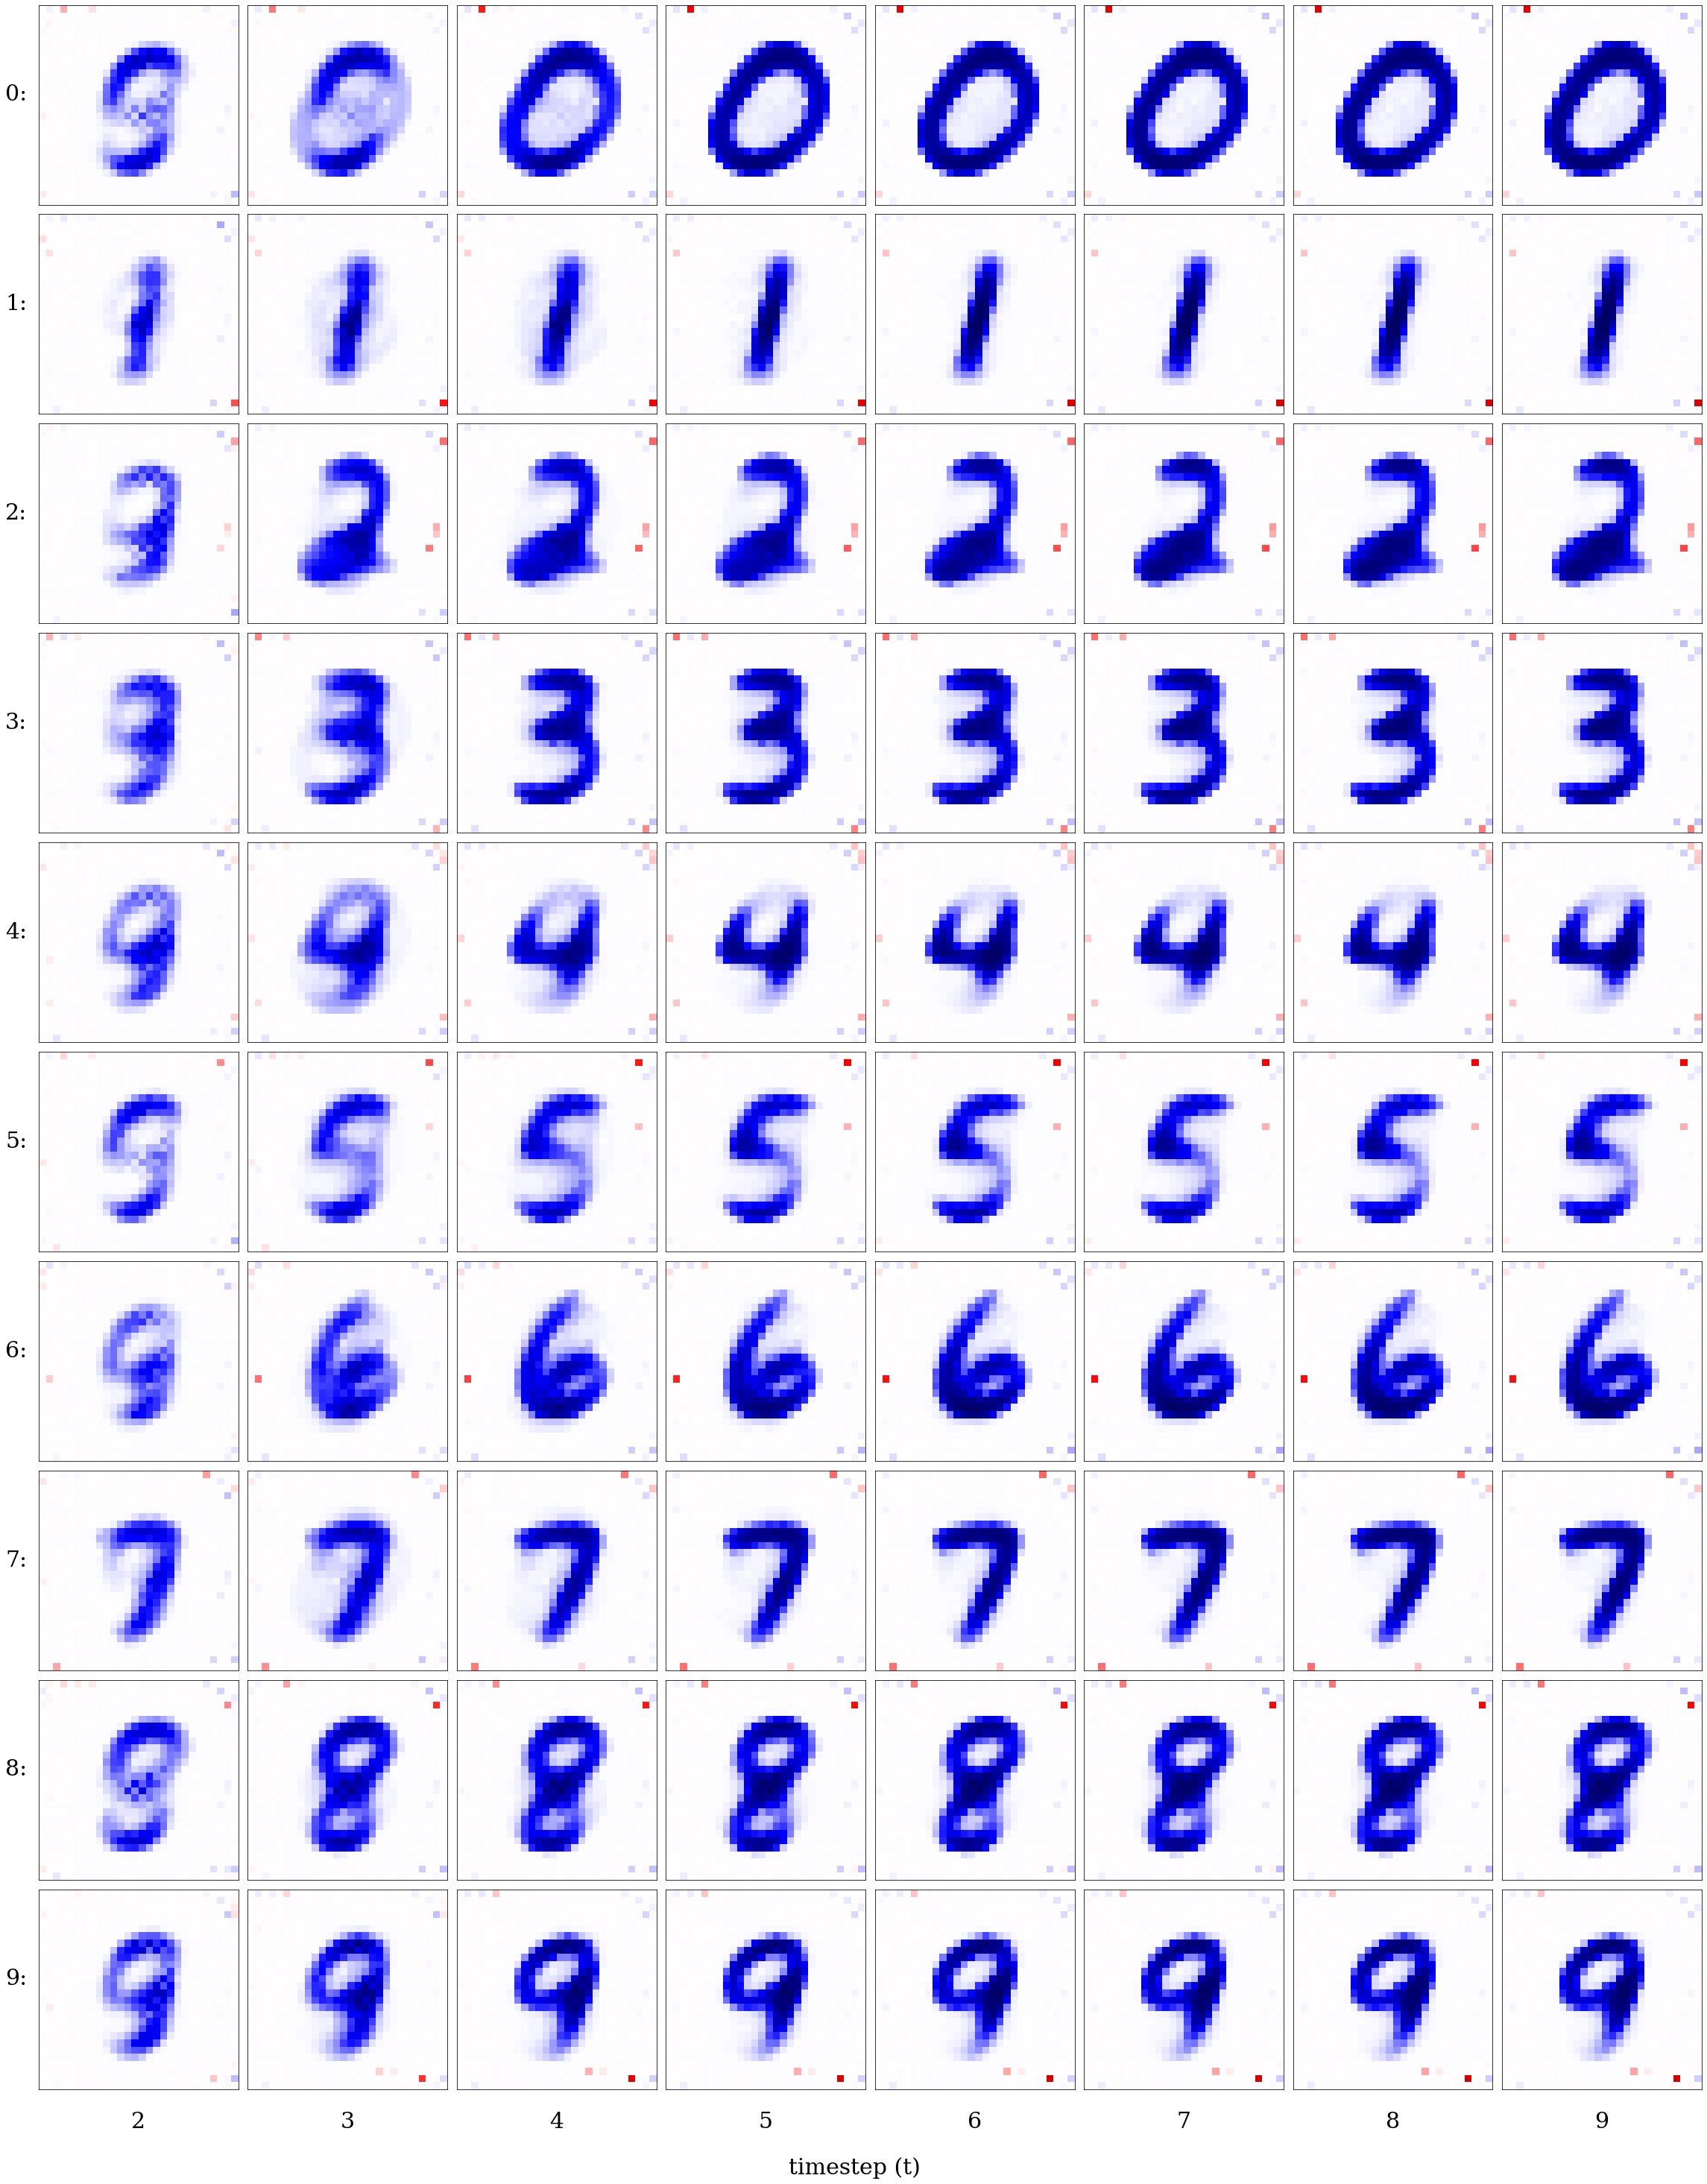

In [48]:
plot.pred_after_timestep(ms, test_set, mask=None, save=False)

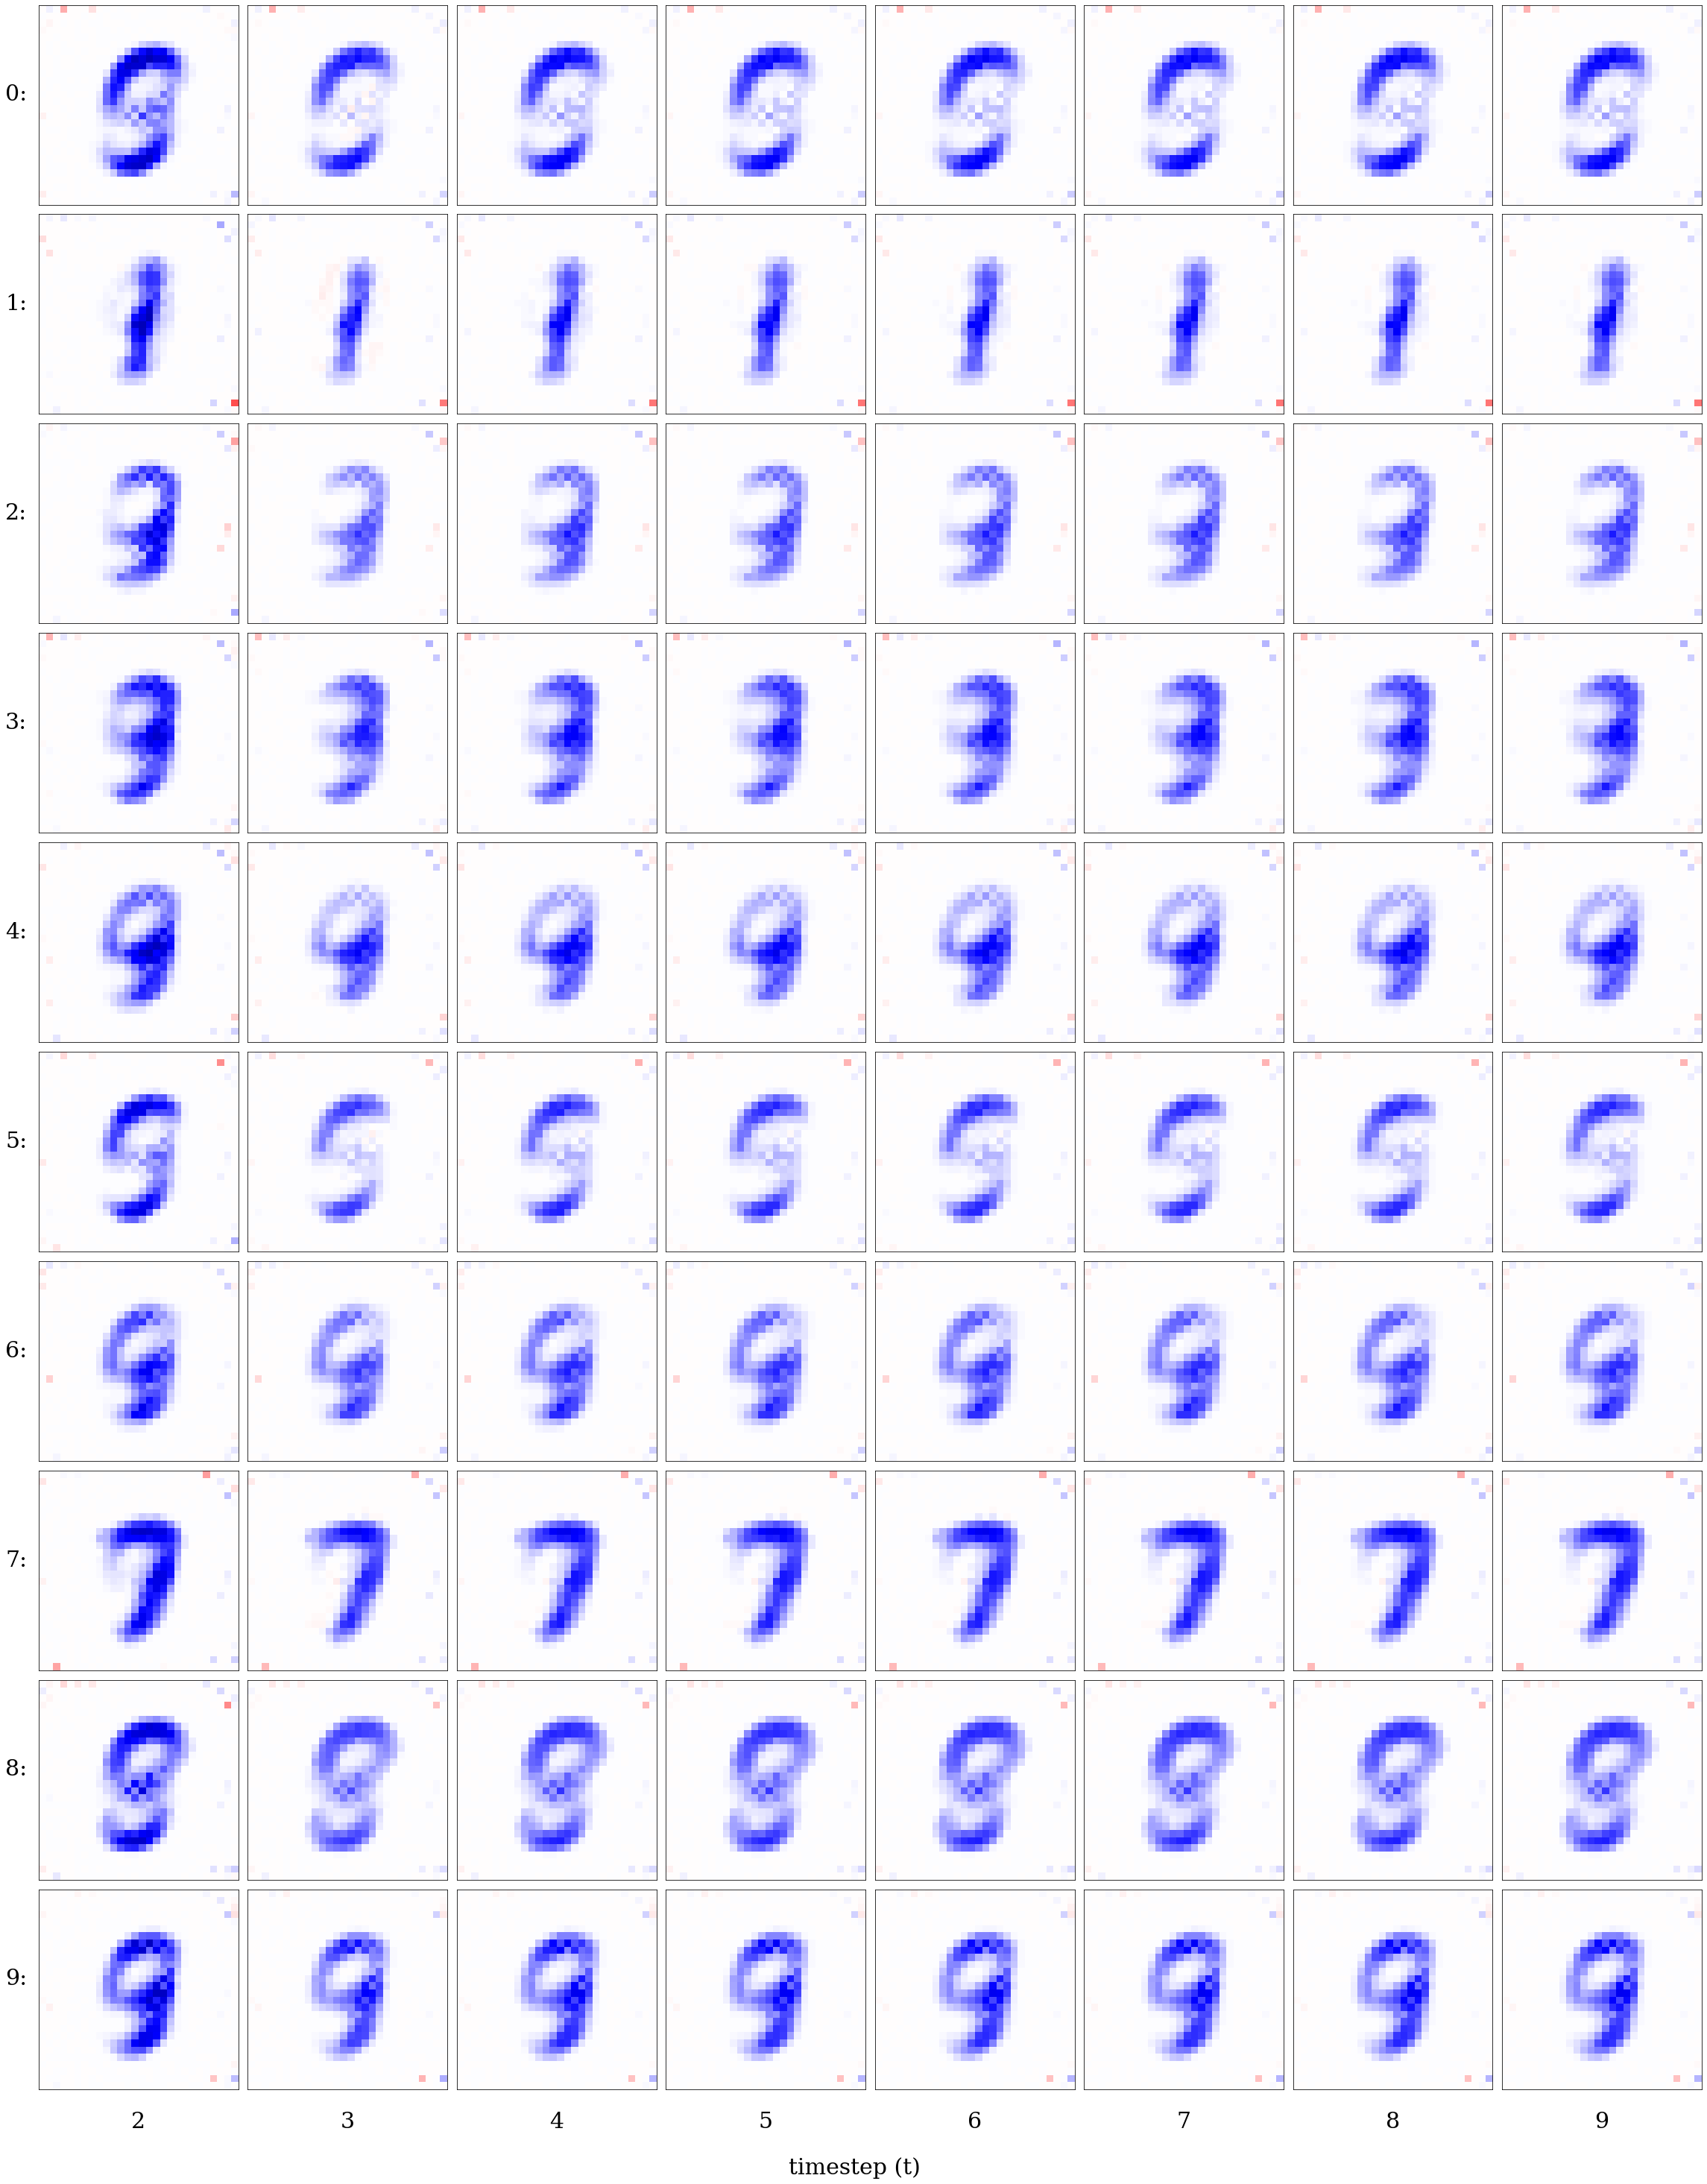

In [17]:
plot.pred_after_timestep(ms, test_set, mask=plot._pred_mask(ms, test_set), save=False)

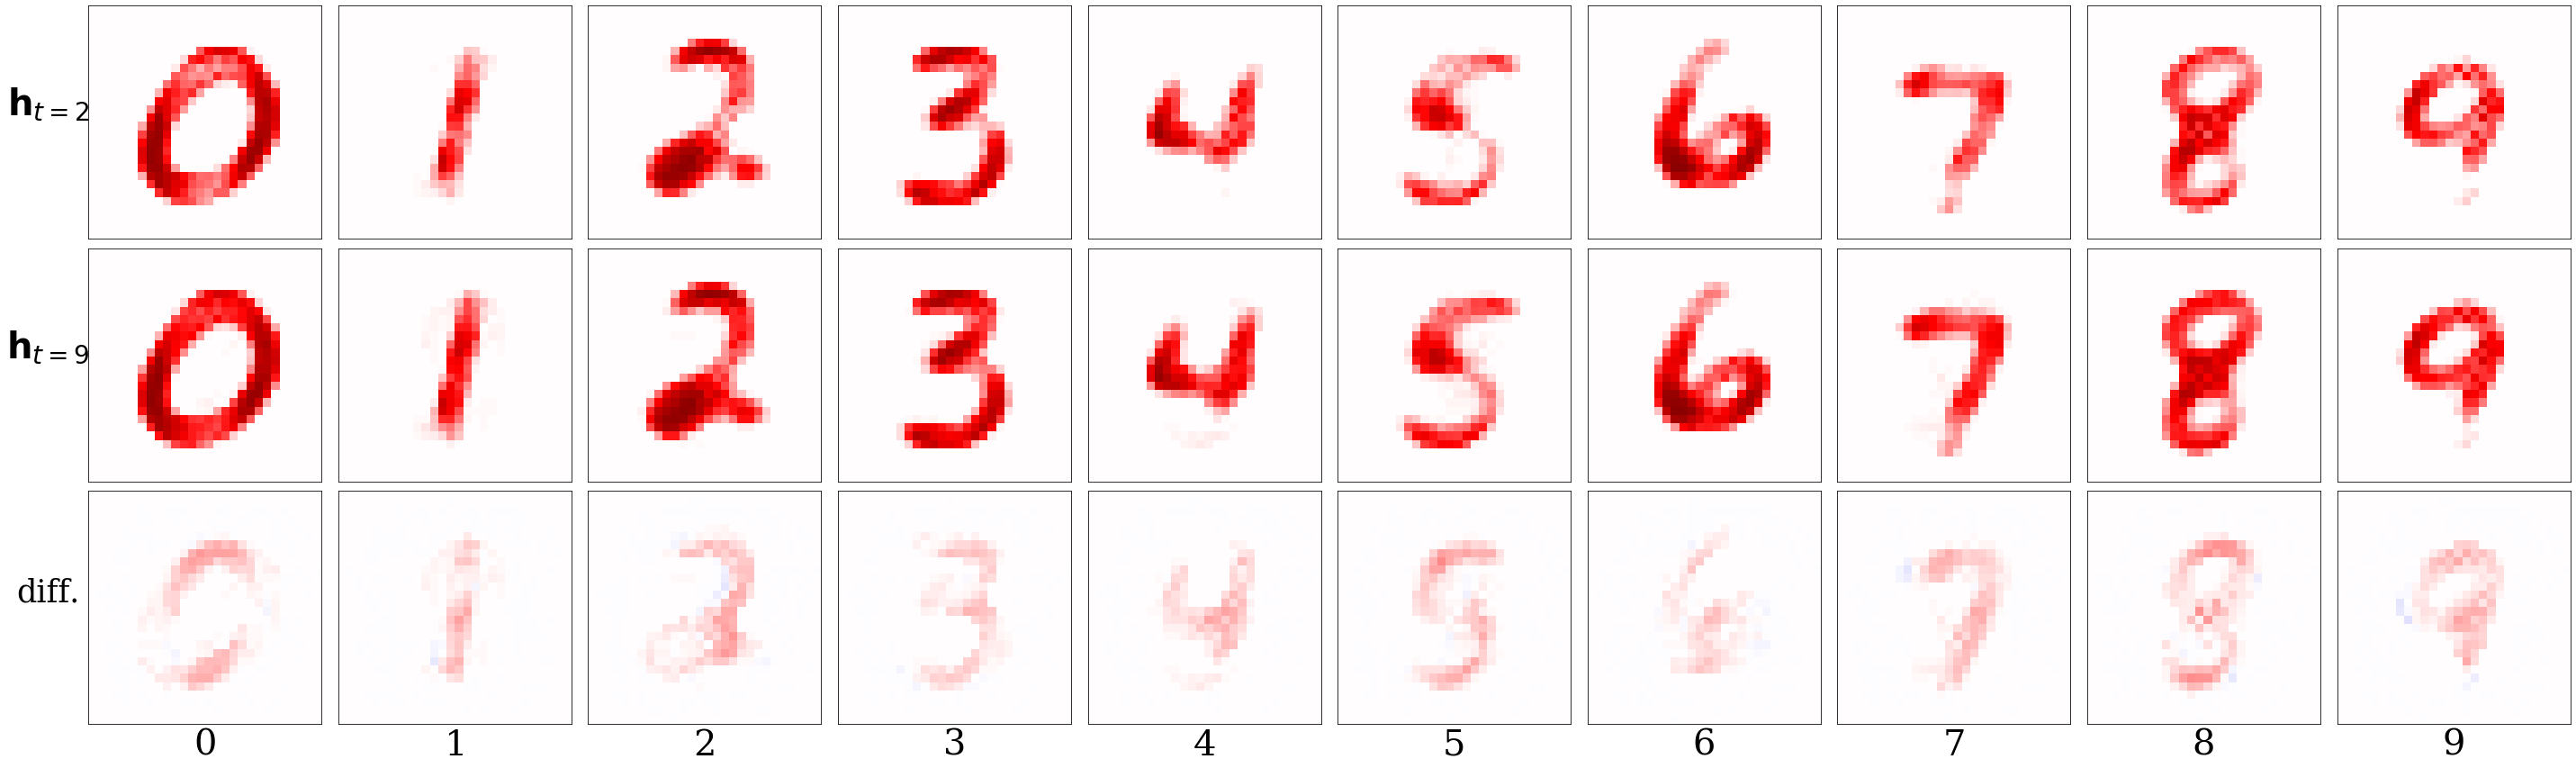

In [18]:
plot.difference_h_t2_vs_t9(ms, test_set, mask=plot._pred_mask(ms, test_set), save=False)